In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mt-cars/Lesson 3 Practice/mtcars.csv
/kaggle/input/mt-cars/Lesson 3 Practice/Salaries.csv


<h2 style=color:green align=left> Table of Content </h2>

1) Load Required Liabriaries

2) Read Data

3) EDA(Exploratory Data Analysis) 

    3.1) Missing Values 
    
    3.2) Relation between Features
    
           3.2.1) The correlation between the continuos variables
           
           3.2.2) The correlation between this continuos features and the target
           
    3.3) Find Outliers
    
    3.4) Skew and Kurtosis
    
4) Data Preprocessing

5) Data Visualization

6) Model building and Evaluation

    6.1) XGBoost
    
    6.2) Random Forest Regressor


- The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

- A data frame with **32 observations** on **11 (numeric) variables.**

|Feature     |Description                                   |
|------------|----------------------------------------------|
|mpg         |Miles/(US) gallon                             |                           
|cyl         |Number of cylinders                           |
|disp        |Displacement (cu.in.)                         |
|hp          |Gross horsepower                              |
|drat        |Rear axle ratio                               |
|wt          |Weight (1000 lbs)                             |
|qsec        |1/4 mile time                                 |
|vs          |Engine (0 = V-shaped, 1 = straight)           |
|am          |Transmission (0 = automatic, 1 = manual)      |
|gear        |Number of forward gears                       |
|carb        |Number of carburetors                         |

<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 1) Load Required Liabriaries </h1>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [3]:
from sklearn.model_selection import train_test_split                                 # split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor                                   # this will make a Random Forest Regression
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                 # this will do cross validation

<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 2) Read Data </h1>

In [4]:
mtcars = pd.read_csv("/kaggle/input/mt-cars/Lesson 3 Practice/mtcars.csv")

In [5]:
# Check the first 5 rows
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
# Check the last 5 rows
mtcars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
# Check dimensions
mtcars.shape

(32, 12)

- The output shows that mtars has **32 rows and 12 columns.**

In [8]:
# print the column labels
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [9]:
mtcars_original = mtcars.copy()

In [10]:
display(mtcars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


None

In [11]:
# To get a quick statistical summary
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 3) EDA(Exploratory Data Analysis) </h1>

In [12]:
mtcars['maker'] = mtcars.model.apply(lambda x: x.split()[0])
mtcars['maker']

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

In [13]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [14]:
av_mpg = mtcars.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

In [15]:
pd.crosstab(mtcars.am, mtcars.cyl, margins=True, margins_name="Total").style.background_gradient(cmap='summer_r')

cyl,4,6,8,Total
am,,,,
0,3,4,12,19
1,8,3,2,13
Total,11,7,14,32


<h1 style="background-color:orange; font-family:newtimeroman; font-size:160%; text-align:left;"> 3.1) Missing Values </h1>

In [16]:
display(mtcars.isnull().sum())

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
maker    0
dtype: int64

<h1 style="background-color:orange; font-family:newtimeroman; font-size:170%; text-align:left;"> 3.2) Relation between Features </h1>

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 3.2.1) The correlation between the continuos variables </h1>

a. Pearson Correlation

b. Spearman Correlation

c. kendall

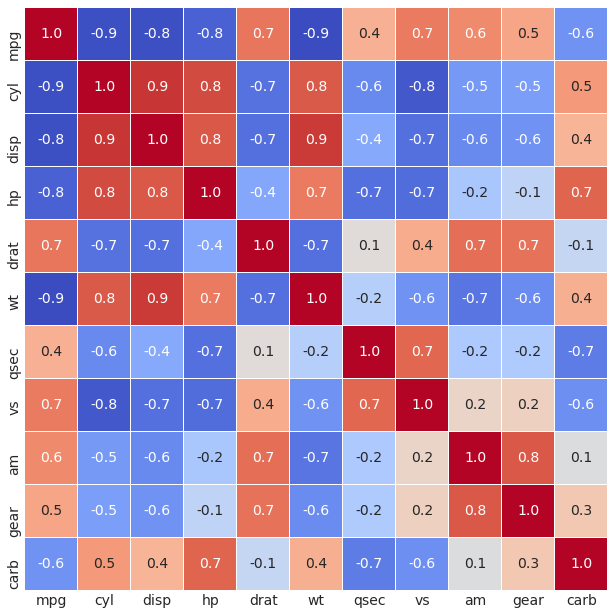

In [17]:
# Pearson Correlation
plt.figure(figsize=(18,10))
sns.heatmap(mtcars.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, square=True, cmap='coolwarm');

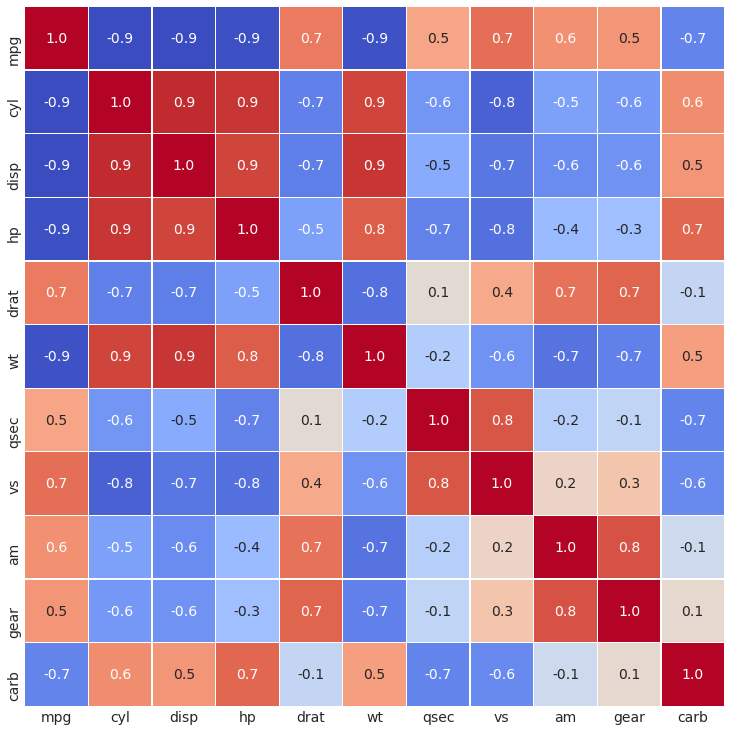

In [18]:
# Spearman Correlation
plt.figure(figsize=(18,12))
sns.heatmap(mtcars.corr(method='spearman'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, square=True, cmap='coolwarm');

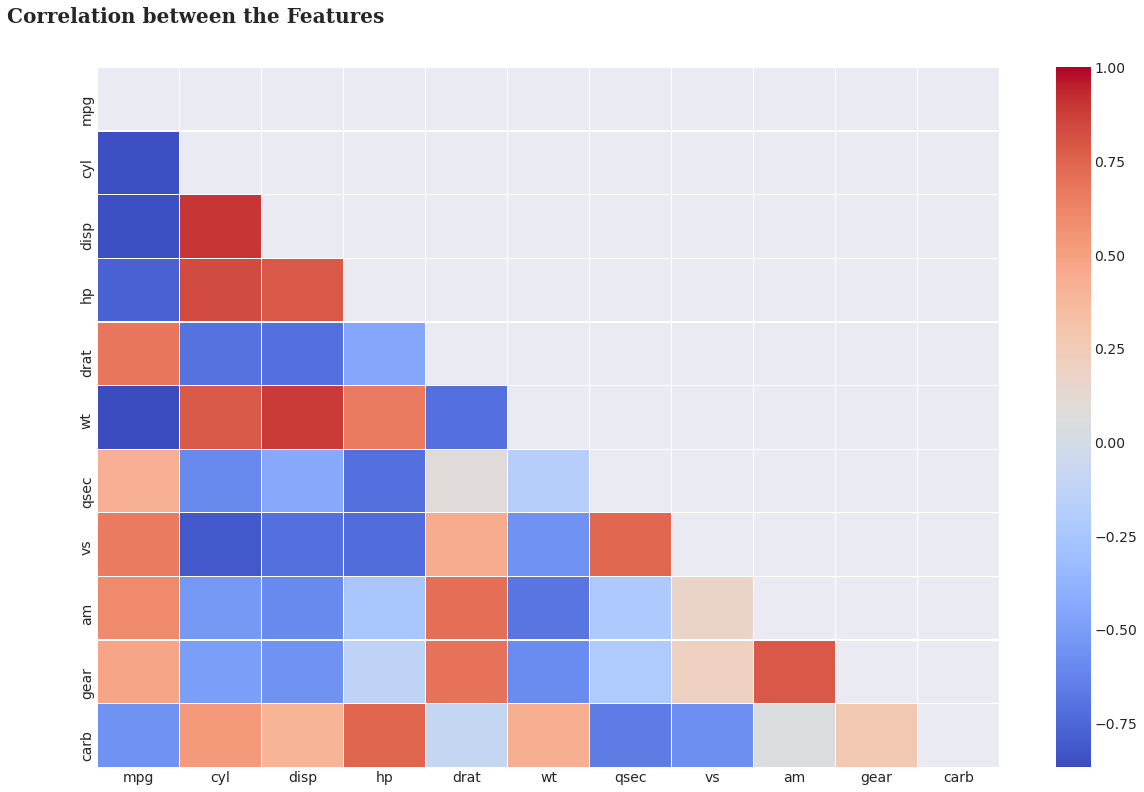

In [19]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = mtcars.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax.text(-1.1, -0.7, 'Correlation between the Features', fontsize=20, fontweight='bold', fontfamily='serif')
sns.heatmap(corr, mask=mask, annot=False, fmt='.2f', linewidth=0.2, cbar=True, cmap='coolwarm');

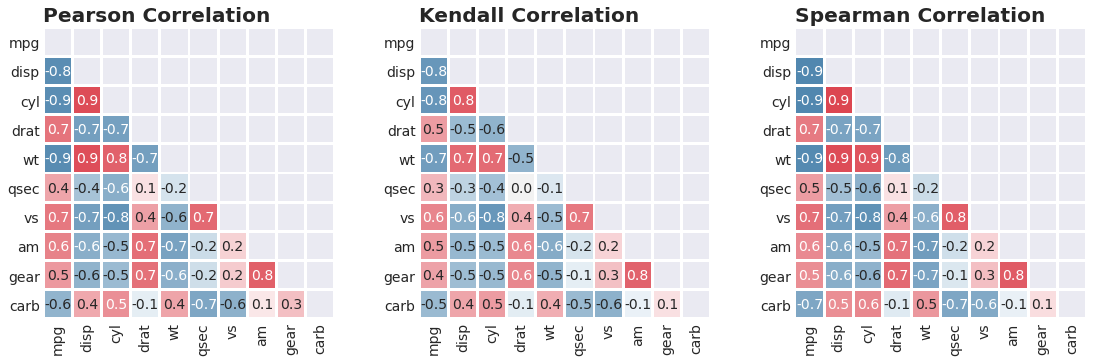

In [20]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(17 , 5))

feature_lst = ['model', 'mpg', 'disp','cyl', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'maker']

corr = mtcars[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(mtcars[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.1f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 3.2.2) The correlation between this continuos features and the target </h1>

In [21]:
mtcars.corr()['hp'].sort_values(ascending=False)

hp      1.000000
cyl     0.832447
disp    0.790949
carb    0.749812
wt      0.658748
gear   -0.125704
am     -0.243204
drat   -0.448759
qsec   -0.708223
vs     -0.723097
mpg    -0.776168
Name: hp, dtype: float64

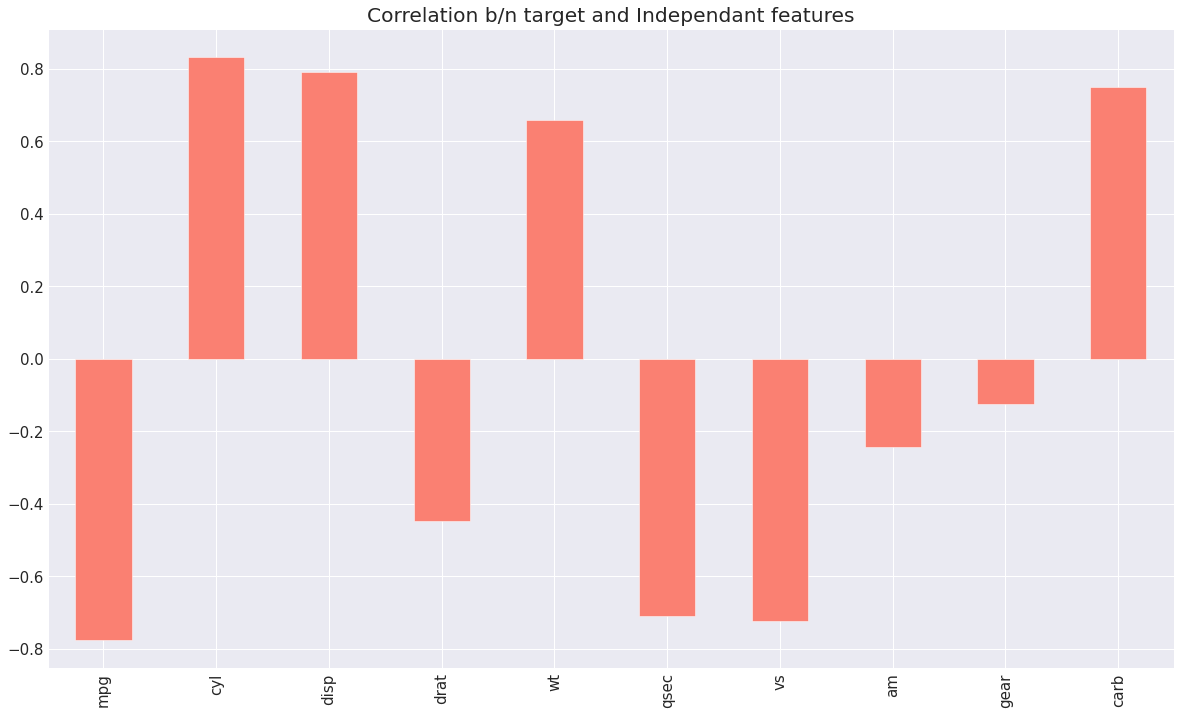

In [22]:
a = mtcars.drop(['hp'], axis=1)
a.corrwith(mtcars['hp']).plot(kind='bar', figsize=(18,11), color=['salmon'])
plt.title('Correlation b/n target and Independant features')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

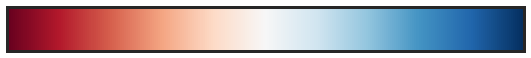

In [23]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

<Figure size 1296x1080 with 0 Axes>

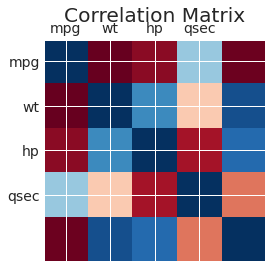

In [24]:
plt.figure(figsize=(18,15))
plt.matshow(mtcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp']);

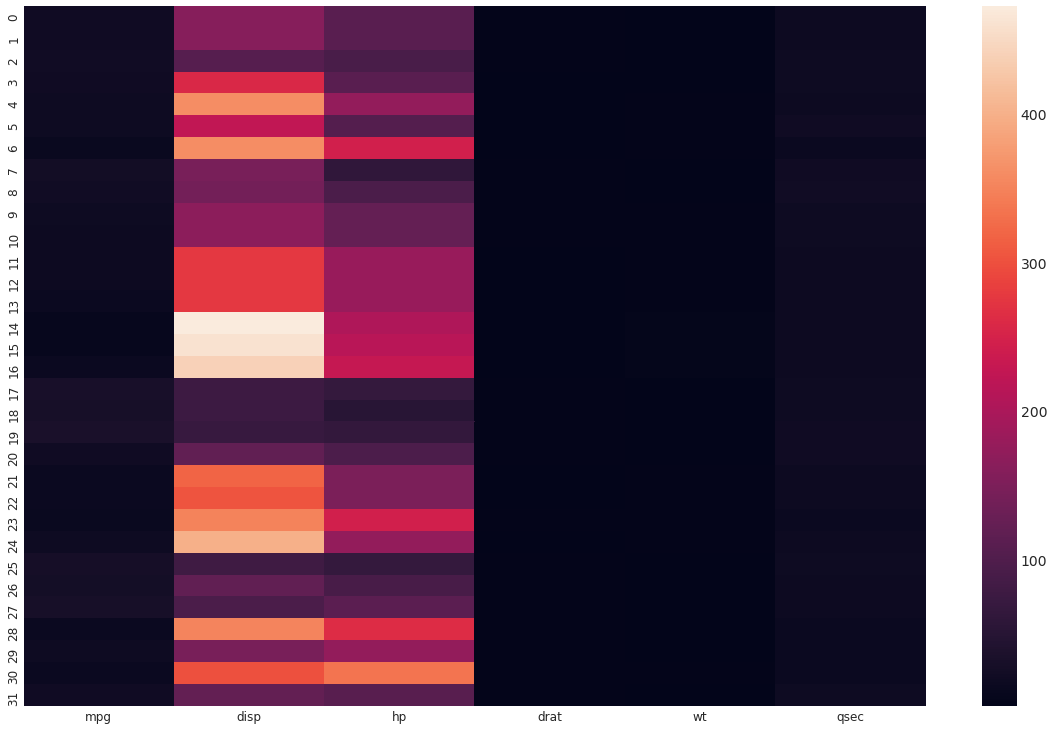

In [25]:
# Heatmap
fig = plt.figure(figsize=(18, 12))
ax = sns.heatmap(mtcars[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<h1 style="background-color:orange; font-family:newtimeroman; font-size:170%; text-align:left;"> 3.3) Find Outliers </h1>

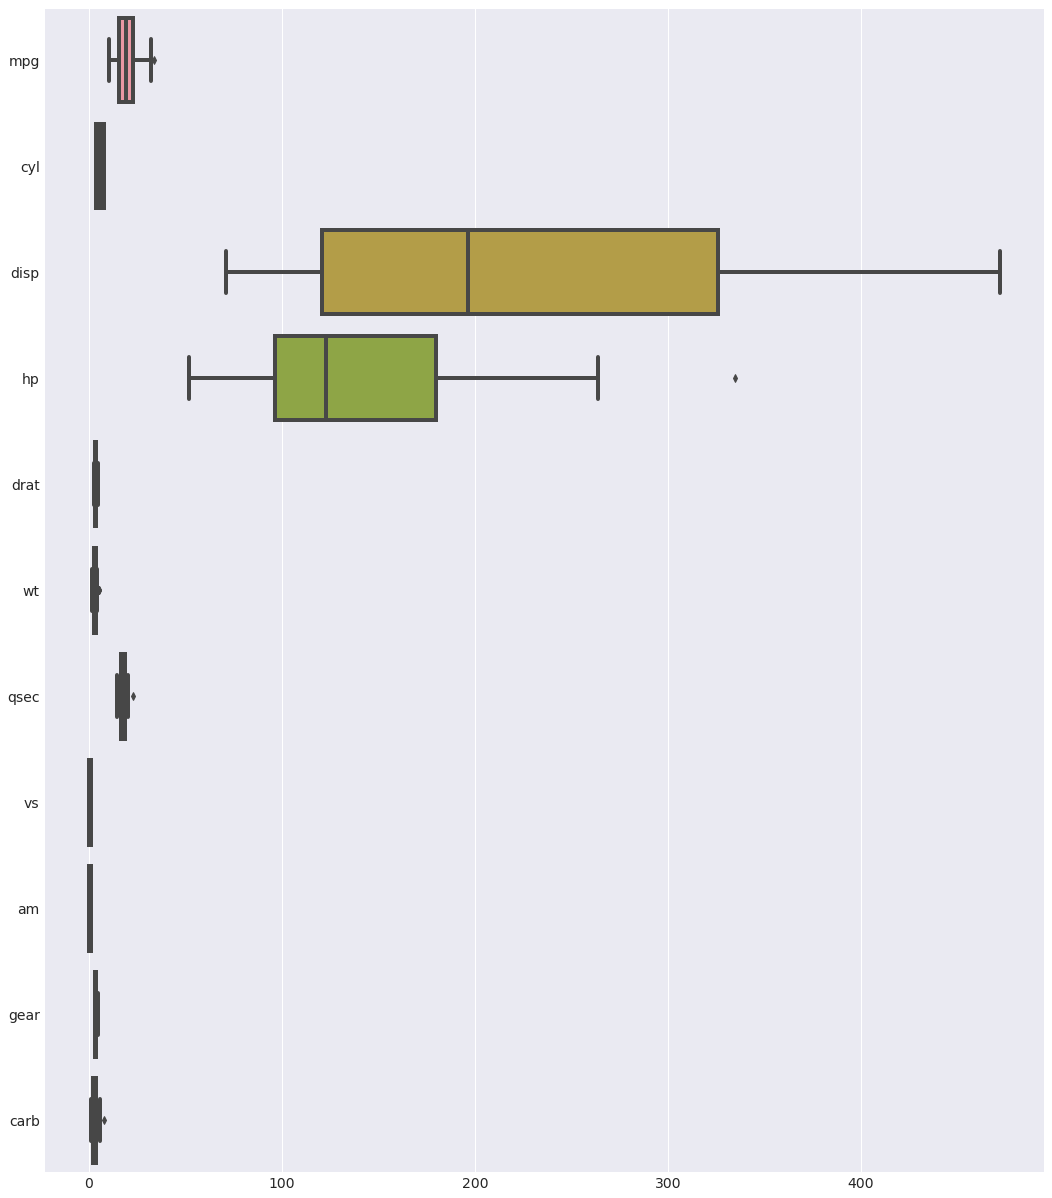

In [26]:
plt.figure(figsize=(16,20))
sns.boxplot(data=mtcars, orient="h");

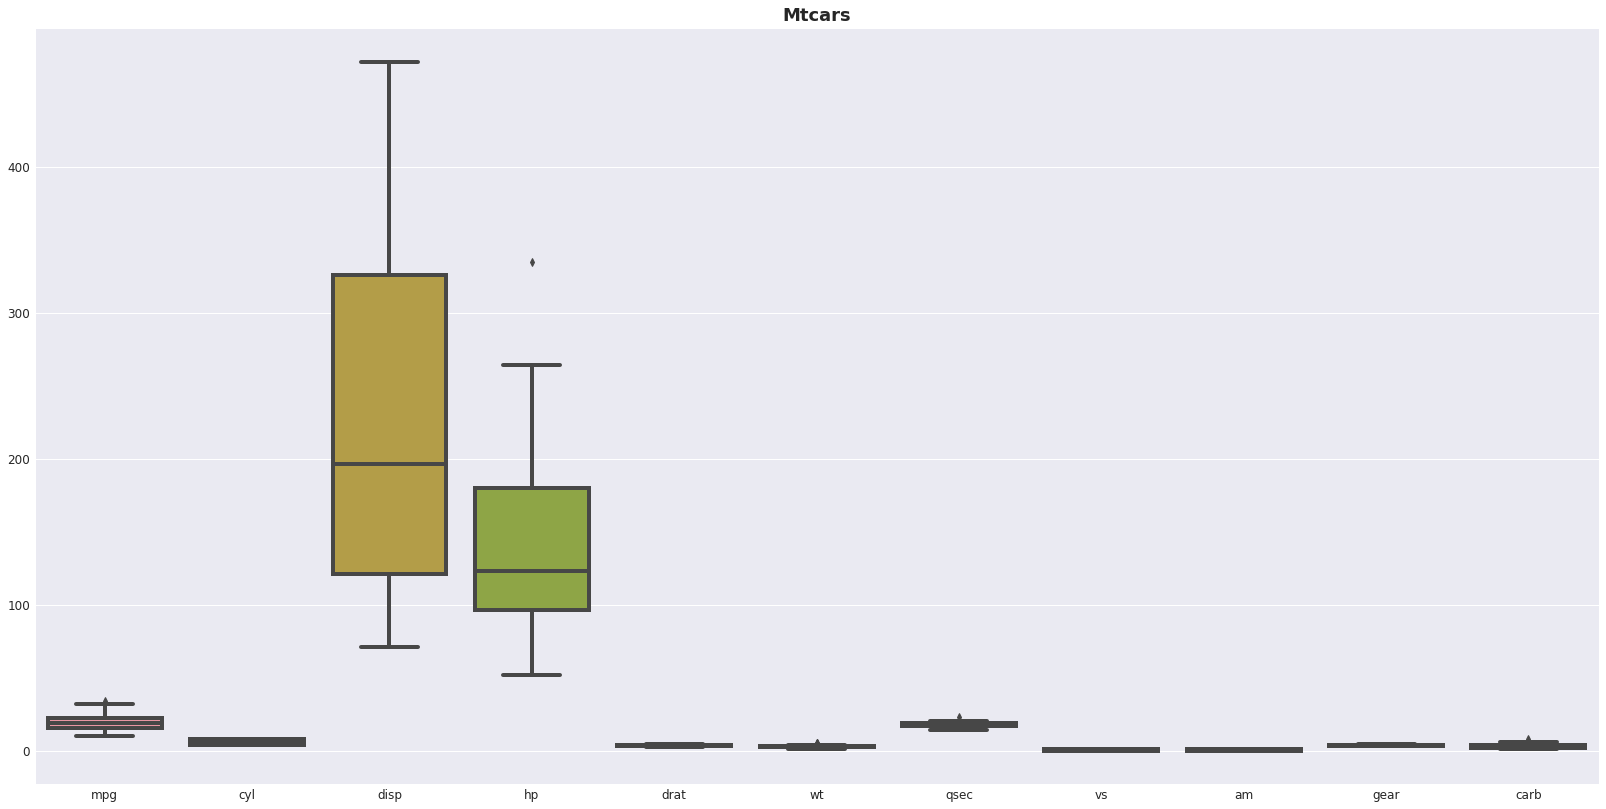

In [27]:
plt.figure(figsize=(25,13))
sns.boxplot(data=mtcars)

plt.title("Mtcars", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

- from above graph identified as **'mpg', 'hp', 'wt', 'qsec' and 'carb'** these features have outliers. 

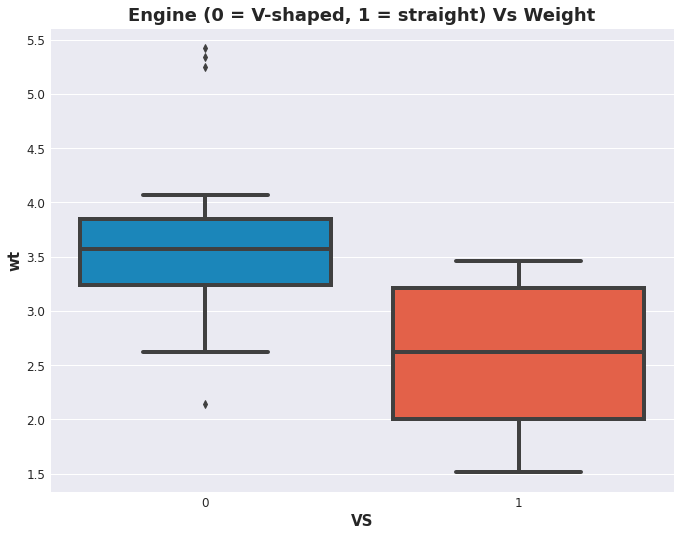

In [28]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(x="vs", y='wt', data=mtcars)

plt.xlabel('VS', fontsize=15, fontweight='bold')
plt.ylabel('wt', fontsize=15, fontweight='bold')

plt.title("Engine (0 = V-shaped, 1 = straight) Vs Weight", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<h1 style="background-color:orange; font-family:newtimeroman; font-size:170%; text-align:left;"> 3.4) Skew and Kurtosis </h1>

In [29]:
mtcars.skew()

mpg     0.672377
cyl    -0.192261
disp    0.420233
hp      0.799407
drat    0.292780
wt      0.465916
qsec    0.406347
vs      0.264542
am      0.400809
gear    0.582309
carb    1.157091
dtype: float64

In [30]:
mtcars["mpg"].skew()

0.6723771376290805

In [31]:
mtcars["mpg"].kurt()

-0.0220062914240855

<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 4) Data Preprocessing </h1>

## a) Model

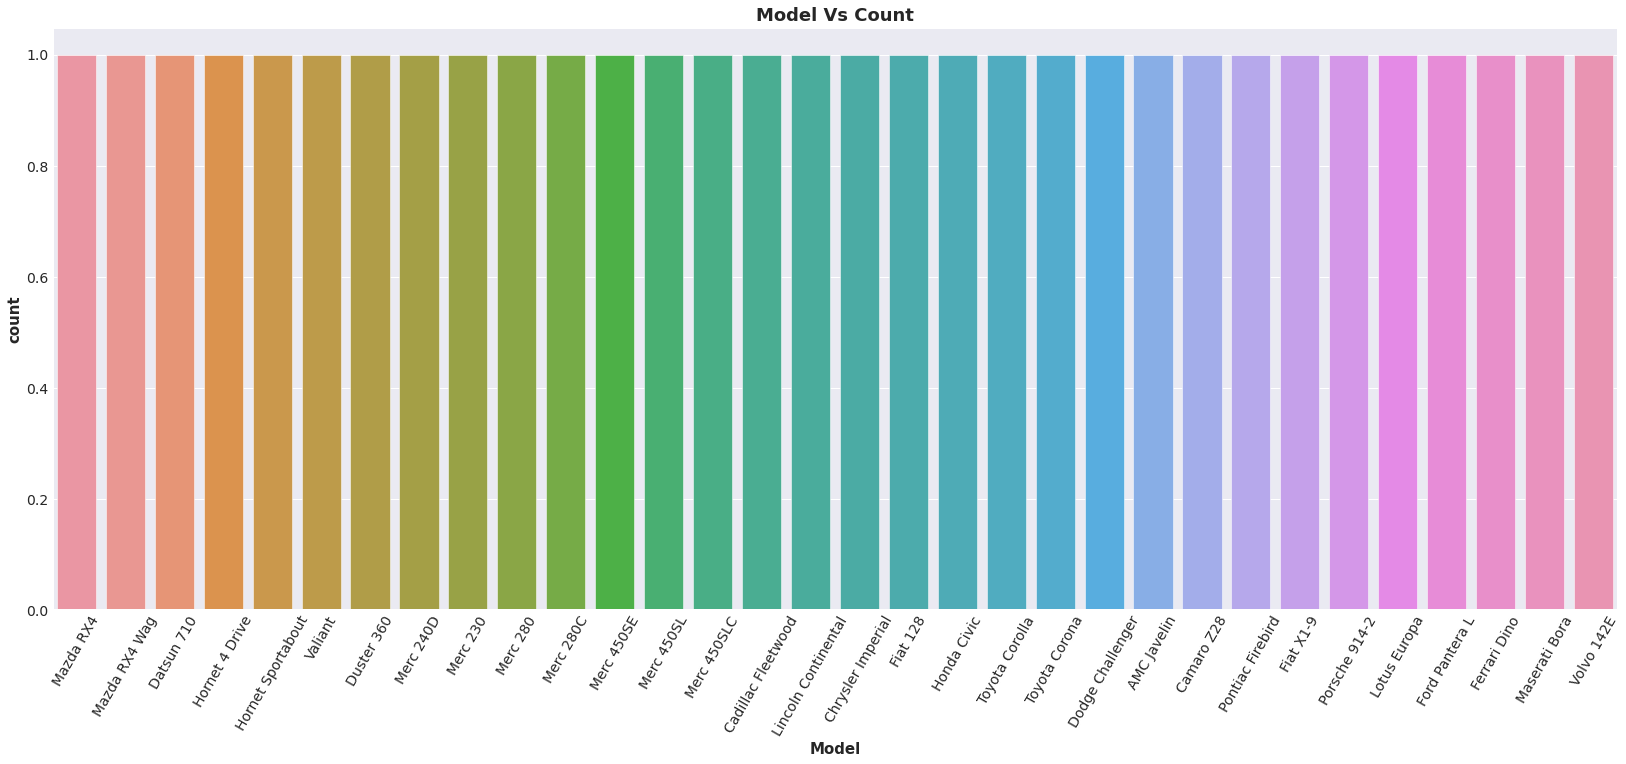

In [32]:
plt.figure(figsize=(25,10))
sns.countplot(mtcars['model'])

plt.xlabel('Model', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.title('Model Vs Count', fontsize=18, fontweight='bold')

plt.xticks(rotation=60)
plt.show()

In [33]:
mtcars['model'].nunique()

32

In [34]:
mtcars['model'].value_counts()

Ferrari Dino           1
Pontiac Firebird       1
Ford Pantera L         1
Duster 360             1
Merc 450SL             1
Lincoln Continental    1
Mazda RX4 Wag          1
Merc 450SLC            1
Maserati Bora          1
Merc 450SE             1
Hornet Sportabout      1
Toyota Corolla         1
AMC Javelin            1
Merc 240D              1
Valiant                1
Merc 280               1
Volvo 142E             1
Datsun 710             1
Lotus Europa           1
Fiat X1-9              1
Mazda RX4              1
Toyota Corona          1
Fiat 128               1
Hornet 4 Drive         1
Merc 280C              1
Cadillac Fleetwood     1
Porsche 914-2          1
Honda Civic            1
Dodge Challenger       1
Chrysler Imperial      1
Camaro Z28             1
Merc 230               1
Name: model, dtype: int64

## b) hp

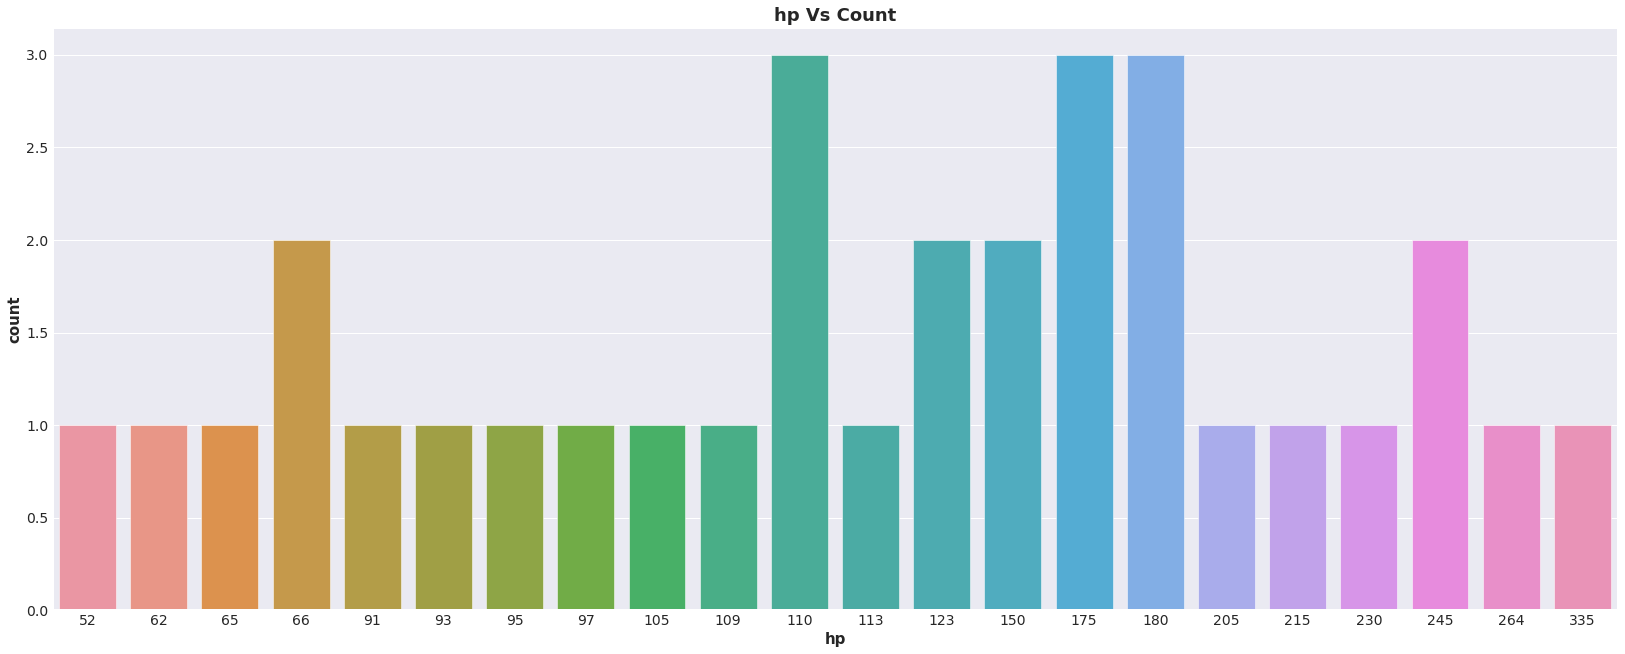

175    3
180    3
110    3
123    2
66     2
150    2
245    2
97     1
65     1
230    1
91     1
264    1
105    1
95     1
205    1
62     1
52     1
113    1
109    1
215    1
93     1
335    1
Name: hp, dtype: int64


In [35]:
plt.figure(figsize=(25,10))
sns.countplot(mtcars['hp'])

plt.xlabel('hp', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.title('hp Vs Count', fontsize=18, fontweight='bold')

plt.xticks(rotation=0)
plt.show()

print(mtcars['hp'].value_counts())

In [36]:
mtcars['hp'].nunique()

22

## c) cyl

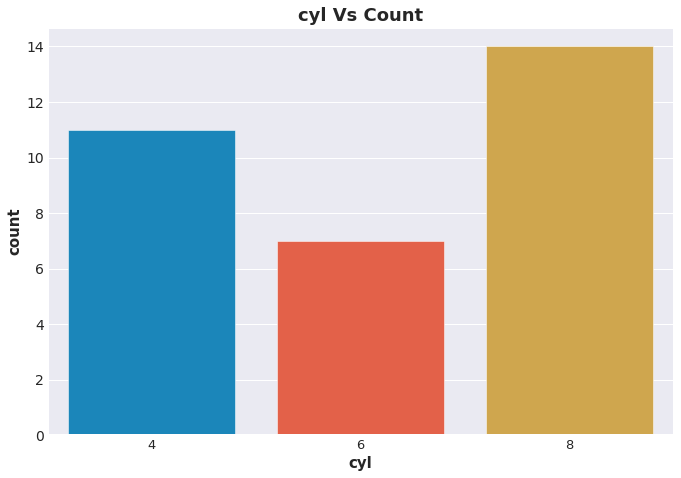

8    14
4    11
6     7
Name: cyl, dtype: int64


In [37]:
plt.figure(figsize=(10,7))
sns.countplot(mtcars['cyl'])

plt.xlabel('cyl', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.title('cyl Vs Count', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13, rotation=0)
plt.show()

print(mtcars['cyl'].value_counts())

In [38]:
mtcars['cyl'].nunique()

3

## d) gear

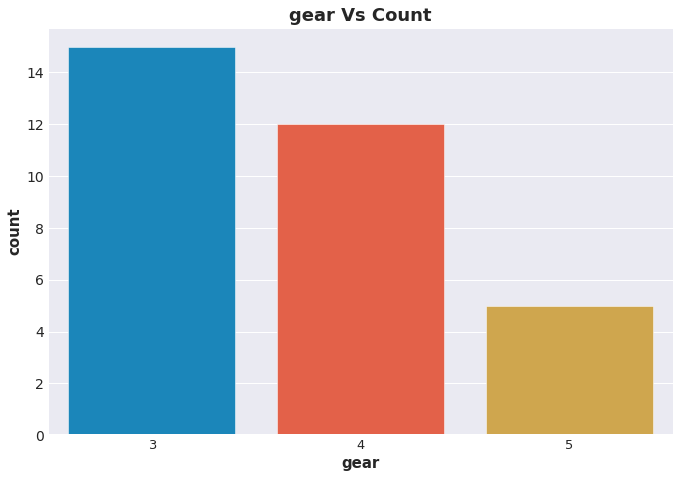

3    15
4    12
5     5
Name: gear, dtype: int64


In [39]:
plt.figure(figsize=(10,7))
sns.countplot(mtcars['gear'])

plt.xlabel('gear', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.title('gear Vs Count', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13, rotation=0)
plt.show()

print(mtcars['gear'].value_counts())

## e.carb

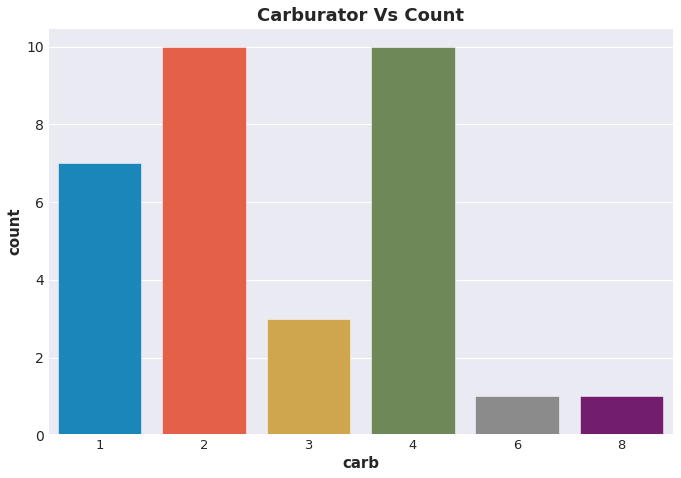

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64


In [40]:
plt.figure(figsize=(10,7))
sns.countplot(mtcars['carb'])

plt.xlabel('carb', fontsize=15, fontweight='bold')
plt.ylabel('count', fontsize=15, fontweight='bold')

plt.title('Carburator Vs Count', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13, rotation=0)
plt.show()

print(mtcars['carb'].value_counts())

<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 5) Data Visualization </h1>

### a. Univariate Analysis

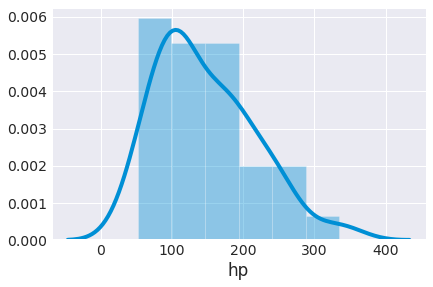

In [41]:
sns.distplot(mtcars['hp'], kde=True)

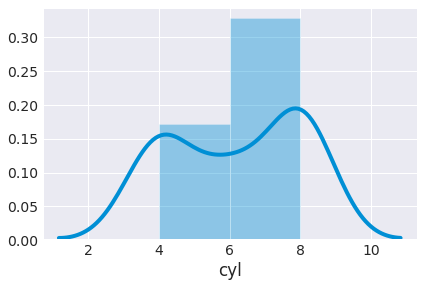

In [42]:
sns.distplot(mtcars['cyl'], kde=True)

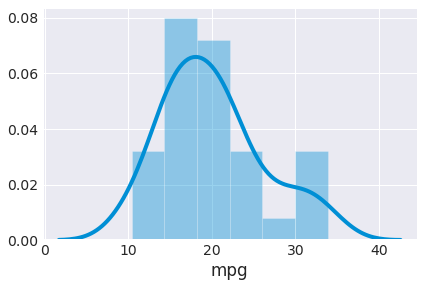

In [43]:
sns.distplot(mtcars['mpg'])

### b. Bivariate Analysis

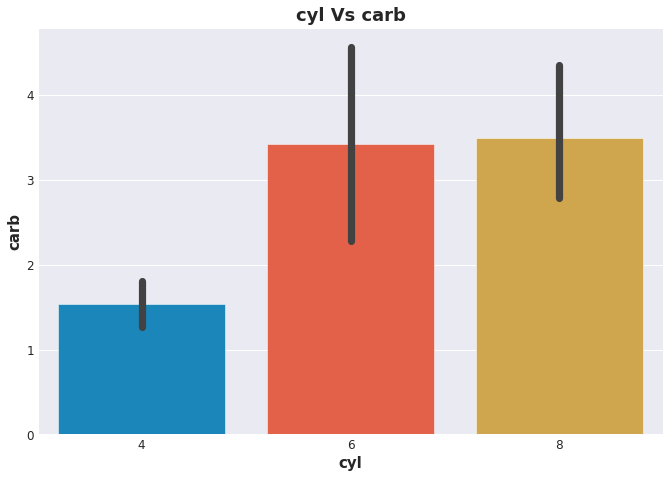

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64


In [44]:
# Bar Plot
plt.figure(figsize=(10,7))
sns.barplot(mtcars['cyl'], mtcars['carb'])

plt.xlabel('cyl', fontsize=15, fontweight='bold')
plt.ylabel('carb', fontsize=15, fontweight='bold')

plt.title('cyl Vs carb', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

print(mtcars['carb'].value_counts())

In [45]:
mtcars_group = mtcars.groupby("cyl").count().reset_index()
mtcars_group

,cyl,model,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,4,11,11,11,11,11,11,11,11,11,11,11,11
1,6,7,7,7,7,7,7,7,7,7,7,7,7
2,8,14,14,14,14,14,14,14,14,14,14,14,14


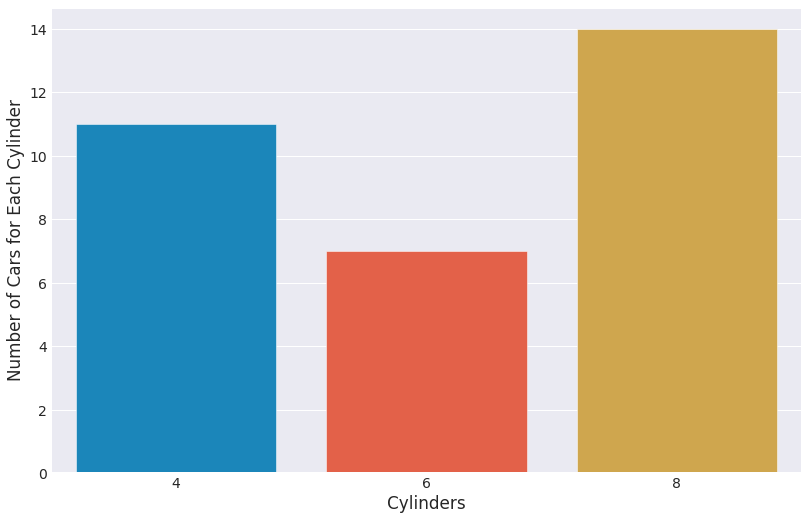

In [46]:
fig = plt.figure(figsize=(12, 8))
ax = sns.barplot(x="cyl", y="mpg", data = mtcars_group)
ax.set(xlabel='Cylinders', ylabel='Number of Cars for Each Cylinder')
plt.show()

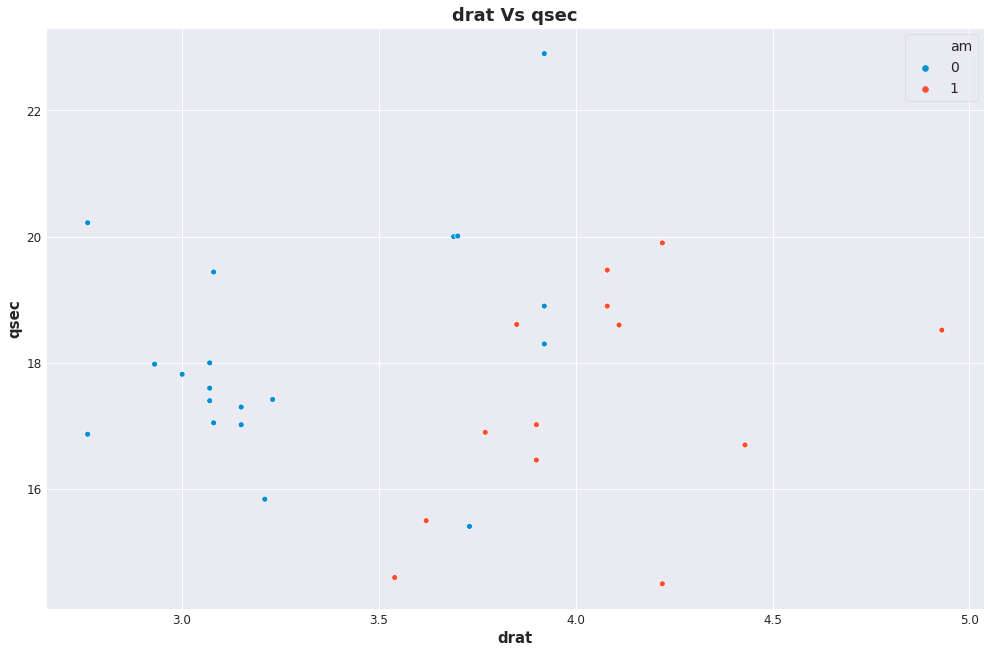

In [47]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(data=mtcars, x = "drat", y = "qsec", hue='am')
sns.set(style='whitegrid',)

plt.xlabel('drat', fontsize=15, fontweight='bold')
plt.ylabel('qsec', fontsize=15, fontweight='bold')

plt.title('drat Vs qsec', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

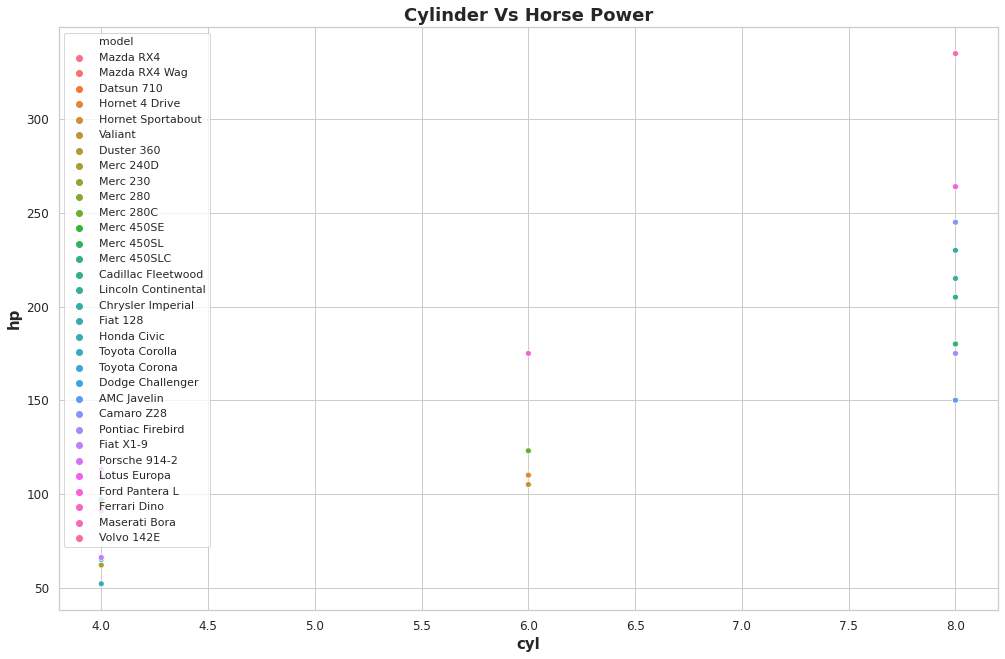

In [48]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(data=mtcars, x='cyl', y='hp', hue="model")

plt.xlabel('cyl', fontsize=15, fontweight='bold')
plt.ylabel('hp', fontsize=15, fontweight='bold')

plt.title('Cylinder Vs Horse Power', fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<Figure size 1800x936 with 0 Axes>

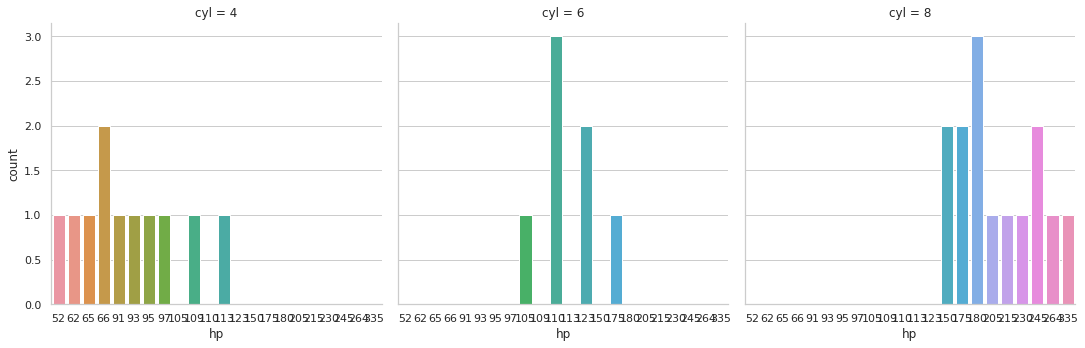

In [49]:
# Catplot
plt.figure(figsize=(25,13))
sns.catplot(x='hp', col='cyl', kind='count', data=mtcars)
plt.show()

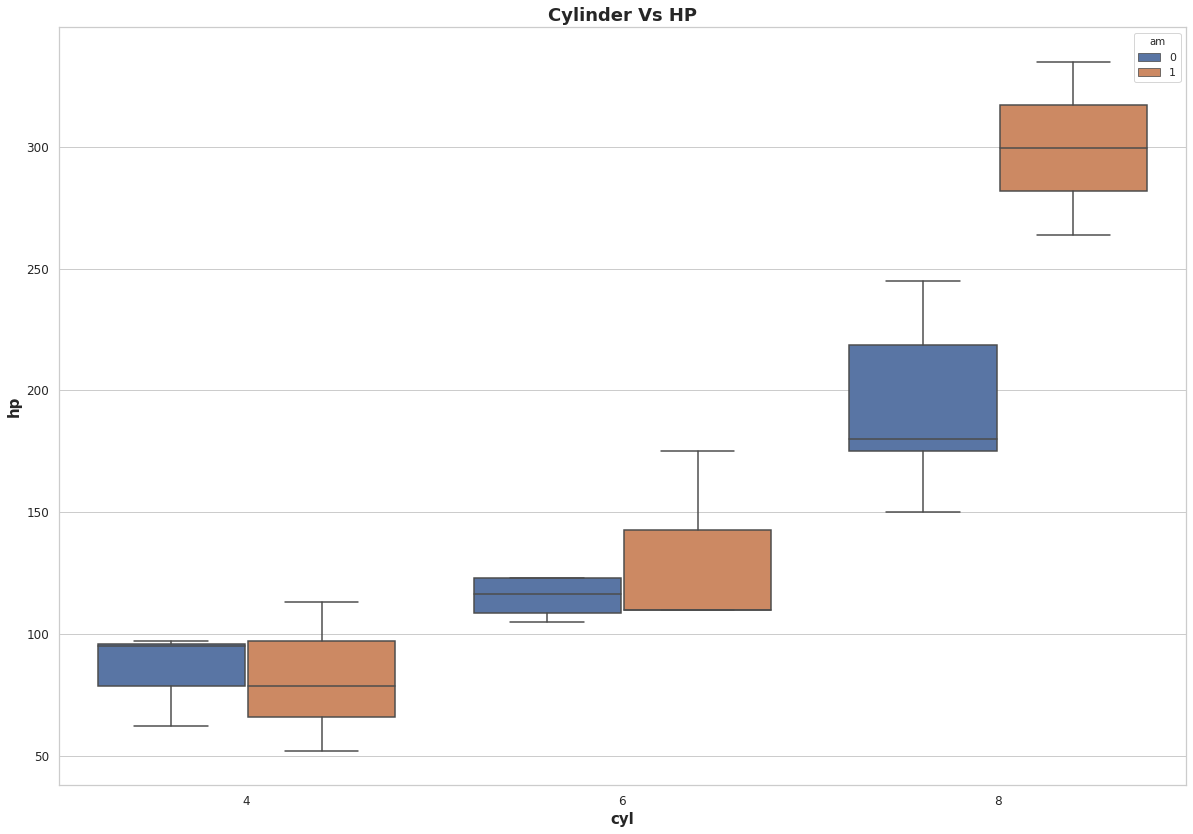

In [50]:
plt.figure(figsize=(18, 13))
sns.boxplot(x='cyl', y='hp', data=mtcars, hue='am')

plt.xlabel('cyl', fontsize=15, fontweight='bold')
plt.ylabel('hp', fontsize=15, fontweight='bold')

plt.title("Cylinder Vs HP", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## LM Plot (Regression)

<Figure size 1080x648 with 0 Axes>

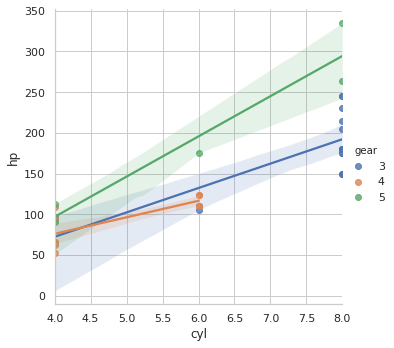

In [51]:
plt.figure(figsize=(15,9))
sns.lmplot(x = "cyl", y = "hp", data = mtcars, hue="gear")
plt.show()

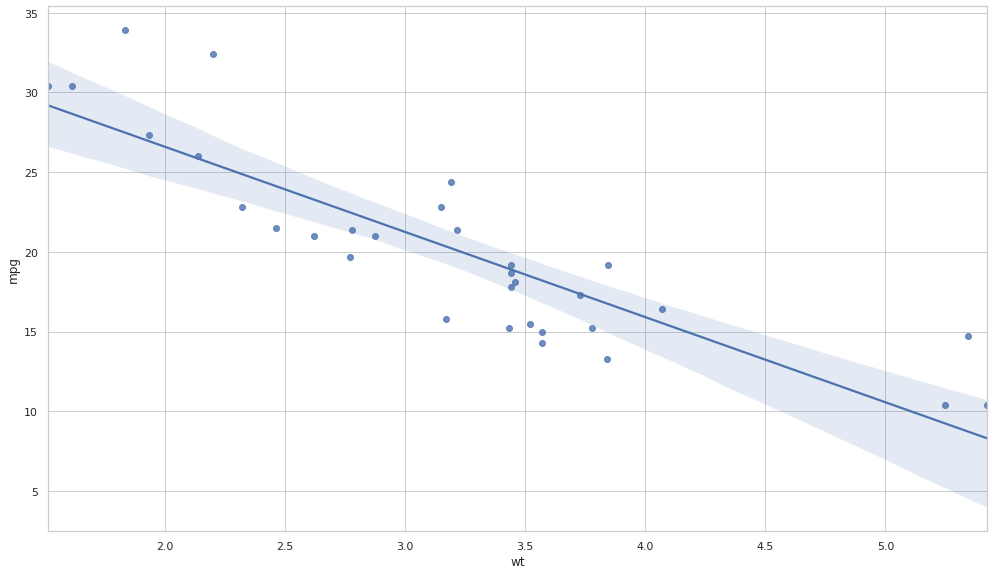

In [52]:
plt.figure(figsize=(15,9))
ax = sns.regplot(x="wt", y="mpg", data=mtcars)
plt.show()

## Violinplot

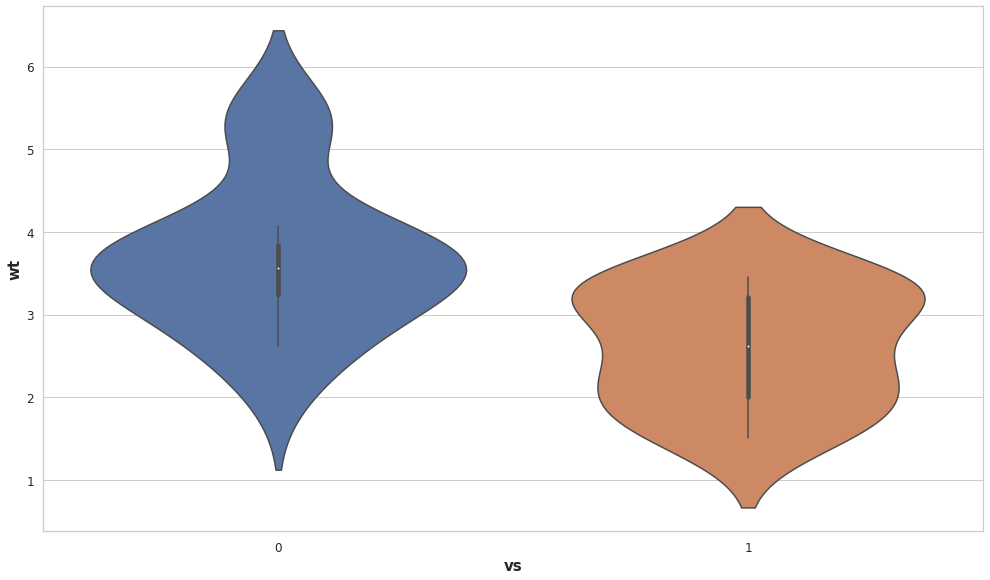

In [53]:
plt.figure(figsize=(15,9))
sns.violinplot(x="vs", y='wt', data=mtcars)

plt.xlabel('vs', fontsize=15, fontweight='bold')
plt.ylabel('wt', fontsize=15, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## c. Multivariate Analysis
### Pair Plot
- A pairs plot allows us to see both __distribution of single variables__ and **relationships between two variables**


- The default pairs plot in seaborn __only plots numerical columns__ later we will __use categorical variables for coloring__


- The pairs plot builds on two basic figures, __the histogram and the scatter plot__.

           
-       a. The __histogram on the diagonal allows us to see the distribution of a single variable__.


-       b. while the __scatter plots on the upper and lower triangles show the relationship between two variables__. 

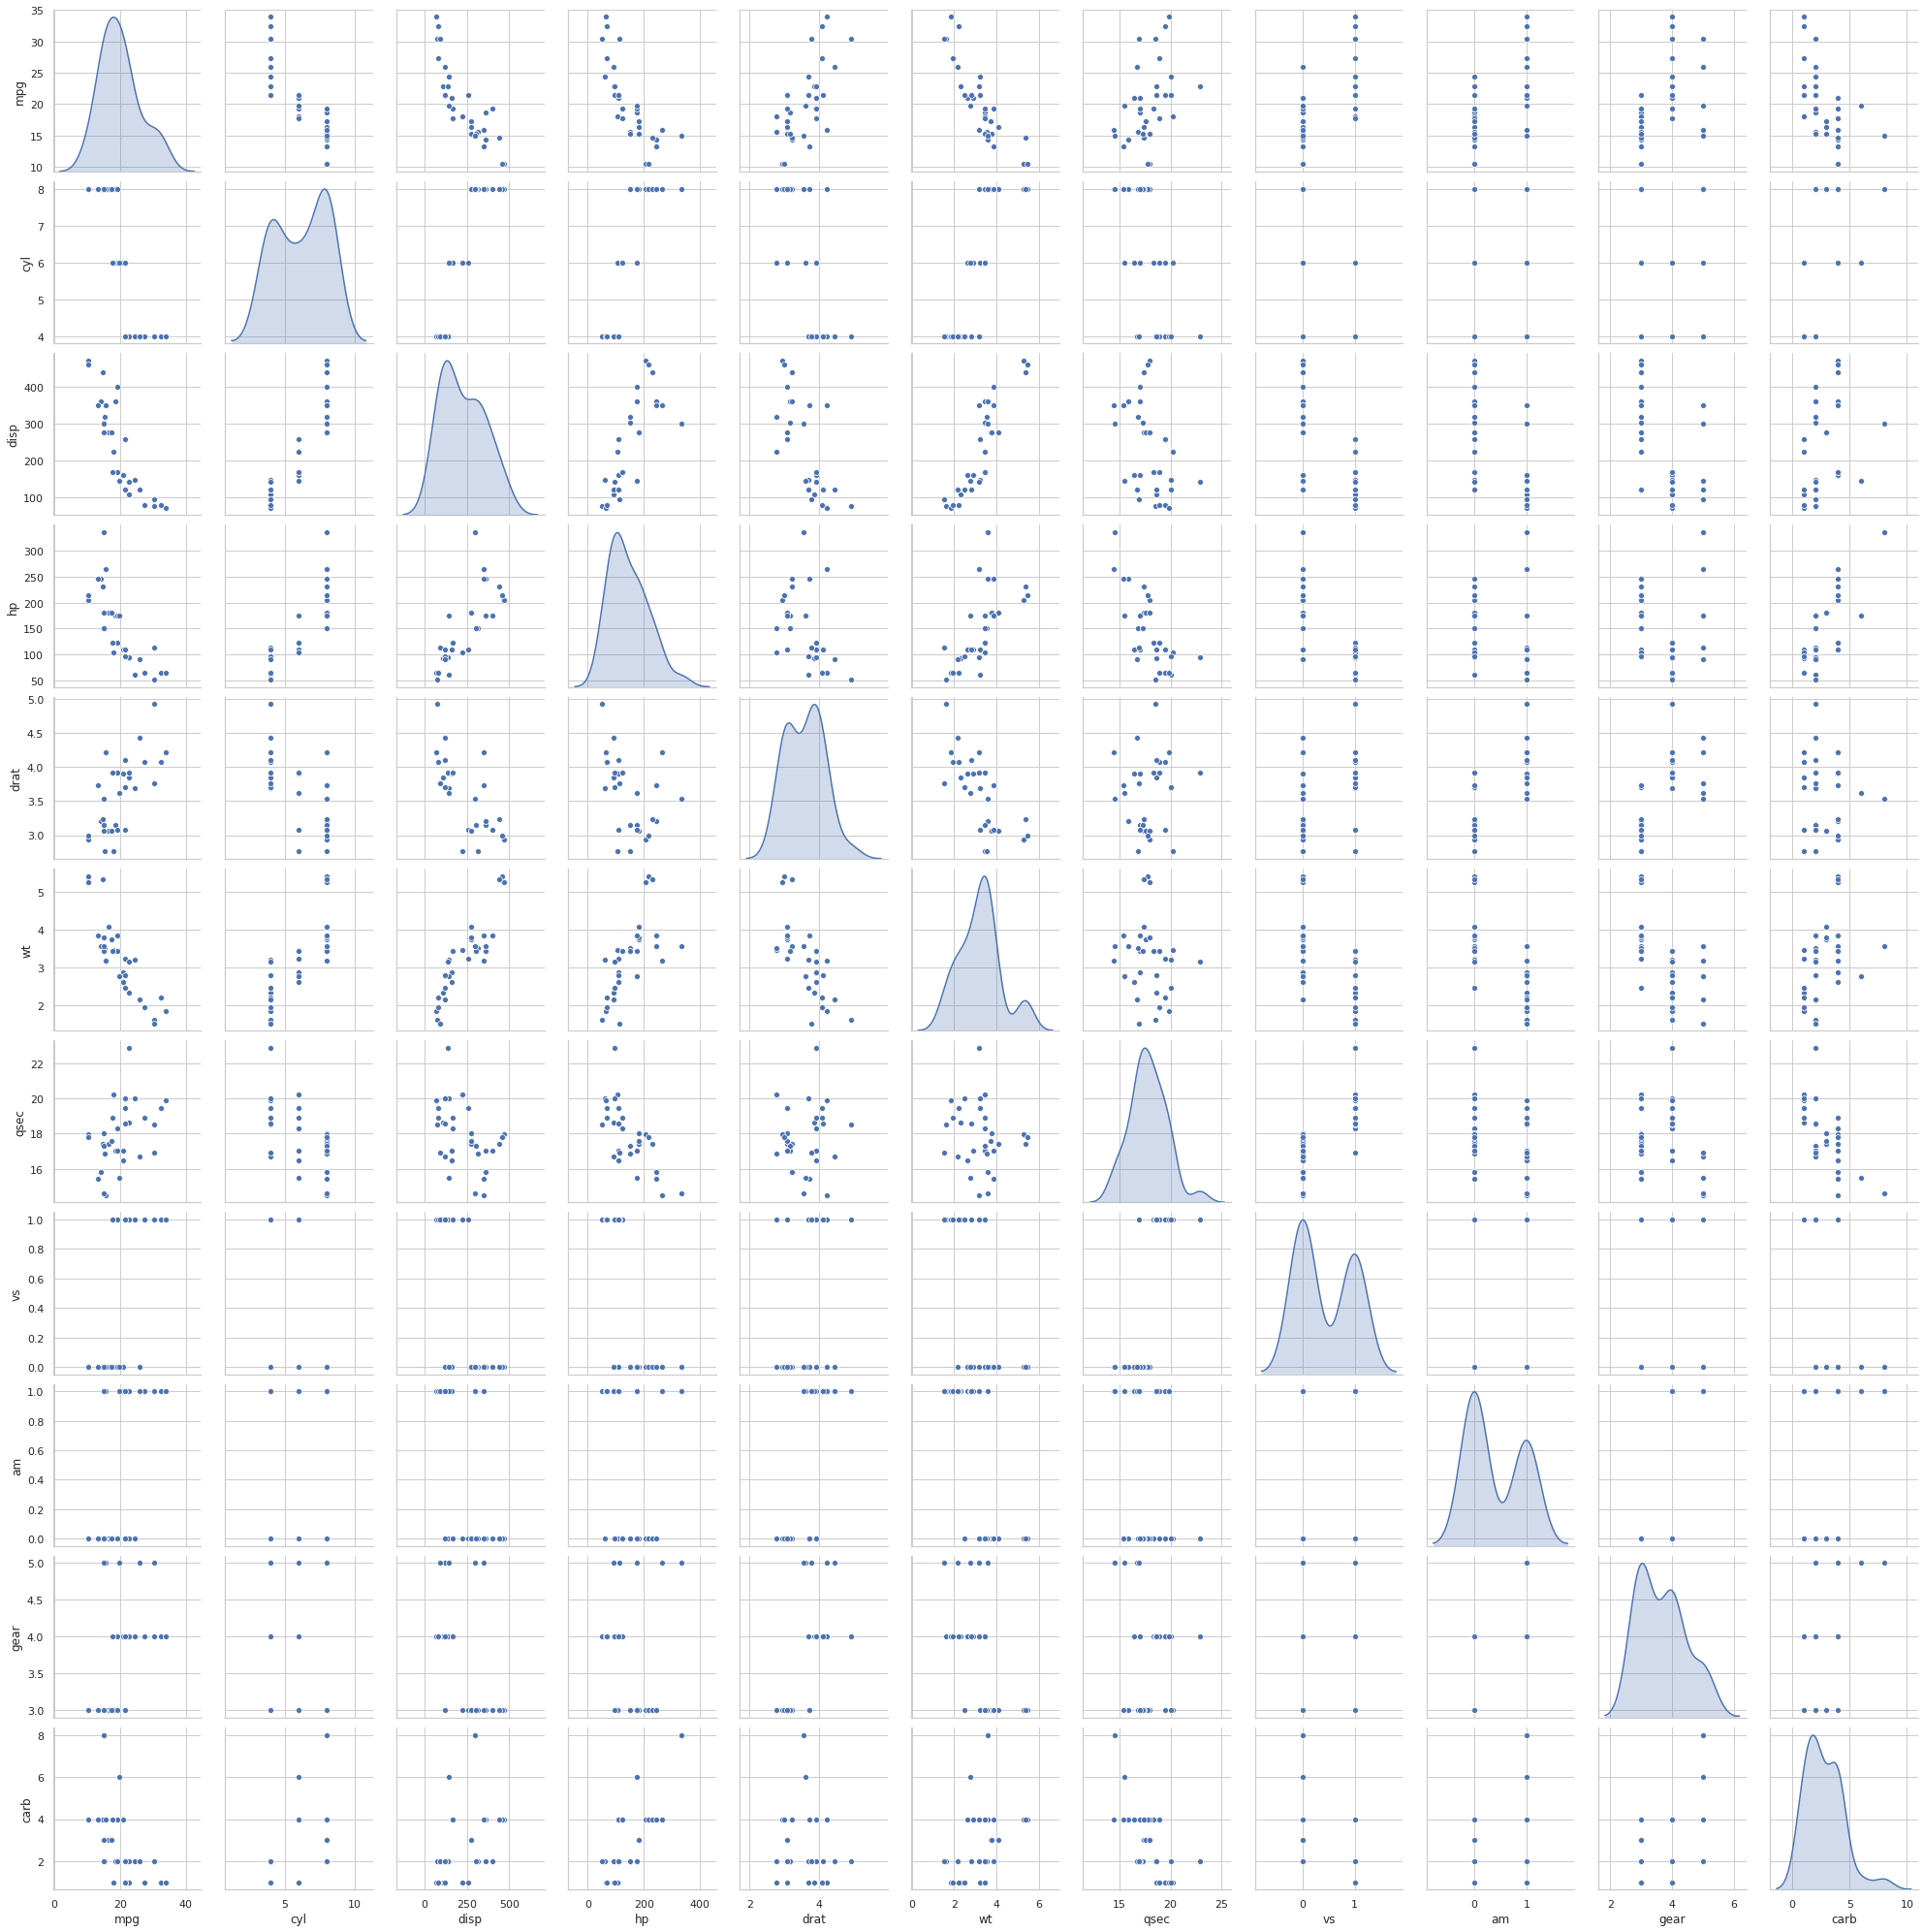

In [54]:
## Checking for pairplot
sns.pairplot(mtcars, diag_kind="kde")

<h1 style="background-color:LimeGreen; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;"> 6) Model building and Evaluation </h1>

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.1) Splitting into Train and Test </h1>

In [55]:
# Independant variable
X = mtcars[['cyl']]                       # All rows & columns exclude Target features

# Dependant variable
y = mtcars['hp'].values                   # Only target feature

In [56]:
# split  data into training and testing sets of 70:30 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [57]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 1) (7, 1) (25,) (7,)


<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.2) Hypothesis Testing </h1>

In [58]:
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [59]:
import statsmodels.api as sms
model = sms.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              476.4
Date:                Fri, 07 May 2021   Prob (F-statistic):                    2.23e-20
Time:                        09:52:06   Log-Likelihood:                         -163.38
No. Observations:                  32   AIC:                                      328.8
Df Residuals:                      31   BIC:                                      330.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           24.3233      1.114     21.826      0.000      22.050      26.596
==============================================================================
Omnibus:                       20.703   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.167
Skew:                           1.673   Prob(JB):                     4.64e-07
Kurtosis:                       6.268   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.3) XGBoost Regressor </h1>

In [60]:
import xgboost
reg_xgb = XGBRegressor()
reg_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 0.65 & Test Score 0.93


<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.3.1) Hyperparameter Tuning </h1>

In [62]:
xgb = XGBRegressor(random_state=42, tree_method='gpu_hist', use_label_encoder=True)

# A parameter grid for XGBoost
params = {'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5, 7, 10],
          'min_child_weight': [1, 3, 5],
          'subsample': [0.5, 0.7],
          'colsample_bytree': [0.5, 0.7],
          'n_estimators' : [100, 200, 500],
          'objective': ['reg:squarederror']
        }

random_cv = GridSearchCV(estimator = xgb,
                         param_grid = params,
                         cv=5,
                         n_jobs = -1,
                         verbose = 1
                        )
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.4min finished


[09:56:30] WARNING: ../src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method='gpu_hist',
                                    use_label_encoder=True,
                            

In [63]:
# best parameter 
random_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [64]:
xgb = XGBRegressor(colsample_bytree= 0.5,
                   learning_rate = 0.01,
                   max_depth = 3,
                   min_child_weigh= 5,
                   n_estimators= 500,
                   objective= 'reg:squarederror'
                  )
                   
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

[09:56:31] WARNING: ../src/learner.cc:516: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weigh=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train,y_train),xgb.score(X_test,y_test)))

Train Score 0.65 & Test Score 0.93


In [66]:
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("MAE: ", mae_xgb)

MAE:  16.737357003348215


In [67]:
plot_importance(xgb, max_num_features = 15)
plt.show()

TypeError: booster must be Booster or LGBMModel.

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.4) Random Forest Regressor </h1>

In [68]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)   # train the model

RandomForestRegressor()

In [69]:
# predicting X_test
y_pred_rfr = rfr.predict(X_test)

In [70]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rfr.score(X_train, y_train),rfr.score(X_test, y_test)))

Train Score 0.65 & Test Score 0.92


Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 18.03 		 324.92 		16.04 		0.92


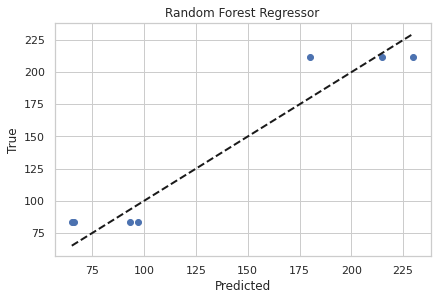

In [71]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),
            mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr),
            r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Random Forest Regressor")

plt.show()

<h1 style="background-color:skyblue; font-family:newtimeroman; font-size:160%; text-align:left;"> 6.4.1) Hyperparameter Tuning </h1>

#### Tuning Hyperparameter of Random Forest Regressor
#### Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#### Maximum number of levels in tree
max_depth = list(range(10,110,10))

#### Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#### Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

rf = RandomForestRegressor(random_state=42)

params = {'n_estimators':n_estimators,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf}

gridcv_rfr = GridSearchCV(rf, param_grid = params, n_jobs=-1)
gridcv_rfr.fit(X_train, y_train)

In [72]:
print("Best Parameters:",gridcv_rfr.best_params_)
print("Train Score {:.2f} & Test Score {:.2f}".format(gridcv_rfr.score(X_train,y_train),gridcv_rfr.score(X_test,y_test)))

NameError: name 'gridcv_rfr' is not defined

In [73]:
rf = RandomForestRegressor(max_depth= 100, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 200)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [74]:
# predicting X_test
y_pred_rf = rf.predict(X_test)

In [75]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train),rf.score(X_test, y_test)))

Train Score 0.65 & Test Score 0.91


Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 19.20 		 368.51 		16.48 		0.91


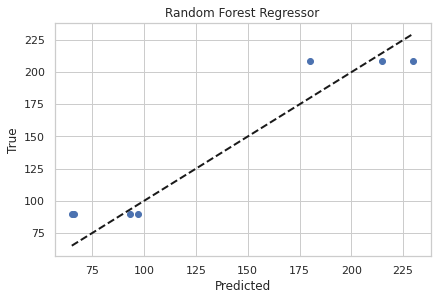

In [76]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),
            mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf),
            r2_score(y_test, y_pred_rf)))

plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.title("Random Forest Regressor")

plt.show()

In [77]:
rf.feature_importances_

array([1.])

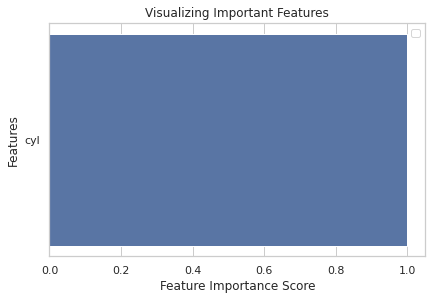

In [78]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Feature: 0, Score: 1.00000


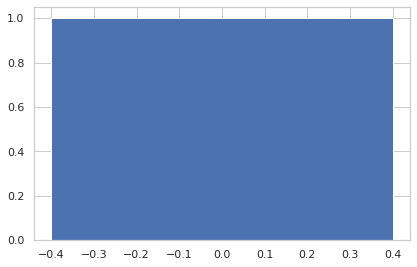

In [79]:
# get importance
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()